In [6]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from src.model.vfs_unet import VfsUNet

model = VfsUNet(in_channels=3, out_channels=3)


def initialize_weights(m):
    if isinstance(m, nn.Conv2d):
        m.weight = nn.init.constant_(m.weight, 1)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight.data, 1)
        nn.init.constant_(m.bias.data, 0)

model = model.apply(initialize_weights).eval()


tensor(3.7689e+18, grad_fn=<MaxBackward1>)
tensor(1., grad_fn=<MaxBackward1>)


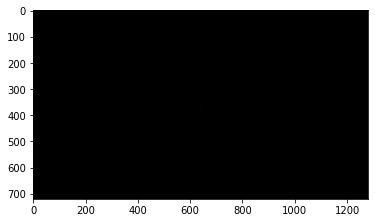

tensor(False)

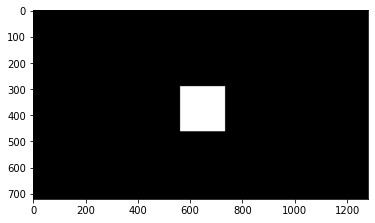

In [7]:
import cv2

data = torch.zeros([1, 3, 720, 1280])
data[:, :, 720 // 2+8, 1280 // 2] = 1

output_data = model.calculate_residue(data)

data = torch.permute(data.squeeze(), (1, 2, 0))
plt.imshow(data)
plt.show()

output_data = torch.permute(output_data.detach().squeeze(), (1, 2, 0))
plt.imshow(output_data)
# plt.savefig("fov.png")
# plt.show()
#

# output_data
((0 < output_data) & (output_data < 1)).any()

# output_data.max(), torch.tanh(output_data).max()

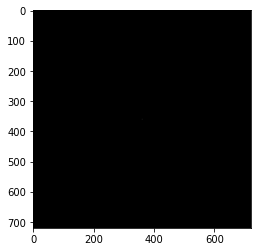

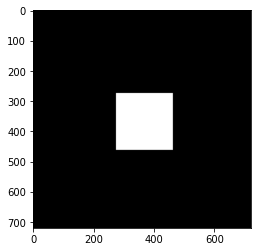

188.0

In [18]:
data = torch.zeros([1, 3, 720, 720])
data[:, :, 720 // 2, 720 // 2] = 1

output_data = (model.calculate_residue(data) > 0).float()

data = torch.permute(data.squeeze(), (1, 2, 0))
plt.imshow(data)
plt.show()

output_data = torch.permute(output_data.detach().squeeze(), (1, 2, 0)).numpy()
plt.imshow(output_data)
cv2.imwrite("fov.png", output_data*255)
plt.show()

(output_data.sum() / 3) ** 0.5

32400